In [6]:
from src.data.dataset_interface import DataInterface
from src.data.data_loader import OpenMLDataLoader, SyntheticDataLoader
import numpy as np
import matplotlib.pyplot as plt

from src.eda.eda import train_logistic_regression

import warnings
warnings.filterwarnings('ignore')

In [7]:
# Load real datasets
dataset_names = ['arcene', 'arrhythmia', 'bioresponse', 'madelon']
datasets = []

for dataset in dataset_names:
    print(f'----- {dataset} -----')

    data_loader = OpenMLDataLoader(dataset_name=dataset, version=1)
    data_interface = DataInterface(data_loader=data_loader, dataset_name=dataset)
    data_interface.preprocess_data(missing_values_strategy='mean')
    datasets.append(data_interface)

    print(f'Shape: {data_interface.data.data.shape}')
    print(f'Class distribution:\n{data_interface.data.labels.value_counts()}')

----- arcene -----
Removed 6175 correlated features.
Shape: (200, 3825)
Class distribution:
1    112
0     88
Name: count, dtype: int64
----- arrhythmia -----
Removed 7 correlated features.
Shape: (452, 272)
Class distribution:
1    245
0    207
Name: count, dtype: int64
----- bioresponse -----
Removed 2 correlated features.
Added 101 dummy features with strategy mean.
Shape: (3751, 1875)
Class distribution:
1    2034
0    1717
Name: count, dtype: int64
----- madelon -----
Removed 10 correlated features.
Added 810 dummy features with strategy mean.
Shape: (2600, 1300)
Class distribution:
1    1300
0    1300
Name: count, dtype: int64


In [8]:
# Load synthetic dataset
p = 0.5
n = 500
d = 100
g = 0.1

print('----- Synthetic Dataset -----')

synthetic_data_loader = SyntheticDataLoader(p=p, n=n, d=d, g=g)
synthetic_data_interface = DataInterface(data_loader=synthetic_data_loader, dataset_name='synthetic')
synthetic_data_interface.encode_labels()
datasets.append(synthetic_data_interface)

print(f'Shape: {synthetic_data_interface.data.data.shape}')
print(f'Class distribution:\n{synthetic_data_interface.data.labels.value_counts()}')

----- Synthetic Dataset -----
Shape: (500, 100)
Class distribution:
0    270
1    230
Name: count, dtype: int64


In [9]:
num_splits = 1
regularization_types = [None, 'l1', 'l2', 'elasticnet']

results = {dataset.dataset_name: {reg: [] for reg in regularization_types} for dataset in datasets}

for dataset in datasets:
    print(f'----- {dataset.dataset_name} -----')
    for split in range(num_splits):
        dataset.split_data(test_size=0.3, val_size=0)
        for reg in regularization_types:
            model, y_pred, accuracy = train_logistic_regression(dataset, regularization_type=reg, solver='saga', max_iter=1000, verbosity=1)
            results[dataset.dataset_name][reg].append(accuracy)


----- arcene -----
No regularization:
Accuracy: 0.7
l1:
Accuracy: 0.75
l2:
Accuracy: 0.7
elasticnet:
Accuracy: 0.7
----- arrhythmia -----
No regularization:
Accuracy: 0.7132352941176471
l1:
Accuracy: 0.7205882352941176
l2:
Accuracy: 0.7132352941176471
elasticnet:
Accuracy: 0.7132352941176471
----- bioresponse -----
No regularization:
Accuracy: 0.7539964476021315
l1:
Accuracy: 0.7602131438721137
l2:
Accuracy: 0.7539964476021315
elasticnet:
Accuracy: 0.7539964476021315
----- madelon -----
No regularization:
Accuracy: 0.5282051282051282
l1:
Accuracy: 0.5230769230769231
l2:
Accuracy: 0.5282051282051282
elasticnet:
Accuracy: 0.5307692307692308
----- synthetic -----
No regularization:
Accuracy: 0.62
l1:
Accuracy: 0.64
l2:
Accuracy: 0.62
elasticnet:
Accuracy: 0.62


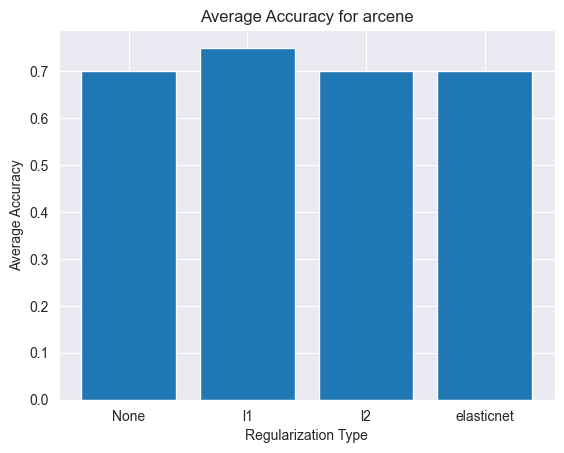

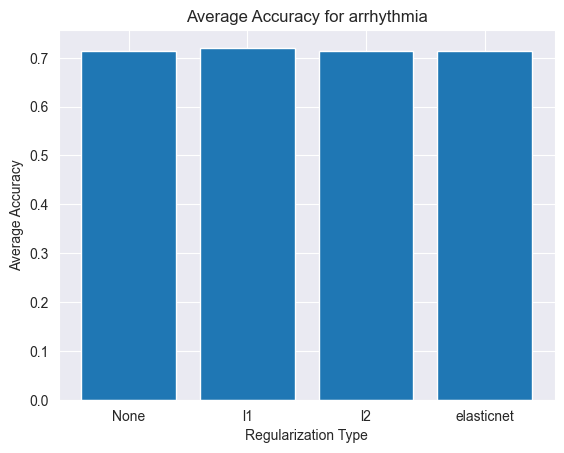

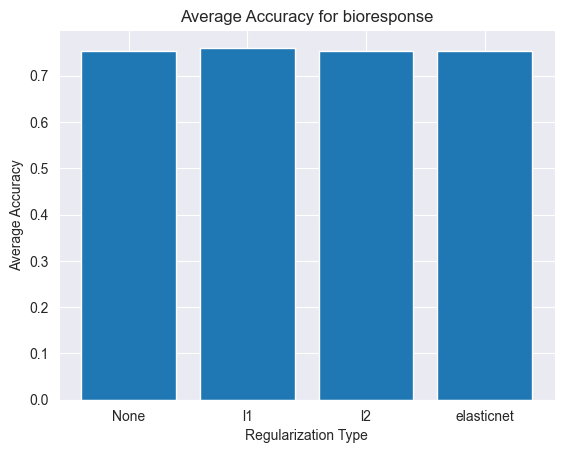

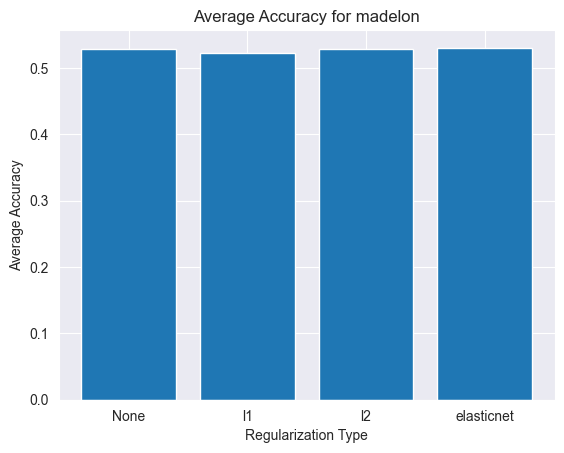

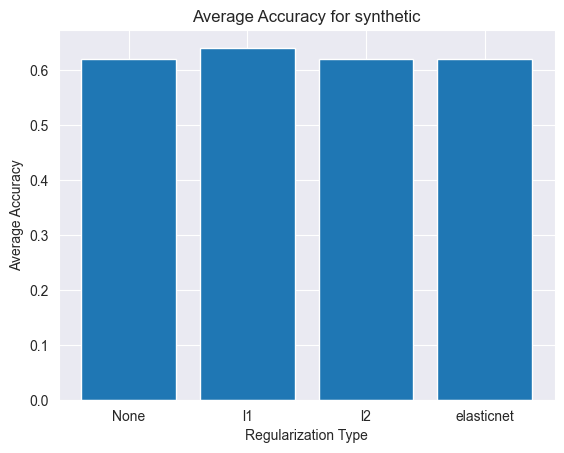

In [10]:
average_results = {dataset: {str(reg): float(np.mean(acc)) for reg, acc in reg_results.items()} for dataset, reg_results in results.items()}

for dataset_name, reg_results in average_results.items():
    plt.figure()
    plt.title(f'Average Accuracy for {dataset_name}')
    plt.bar(reg_results.keys(), reg_results.values())
    plt.xlabel('Regularization Type')
    plt.ylabel('Average Accuracy')
    plt.show()
